In [1]:
!pip install SimpleITK
!pip install matplotlib

/bin/bash: /home/aziz0220/anaconda3/envs/py310/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
/bin/bash: /home/aziz0220/anaconda3/envs/py310/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)


In [8]:
import SimpleITK as sitk
import matplotlib.pyplot as plt
import os

def display_slices(image):
    sagittal_slice = image[int(image.GetWidth() / 2), :, :]
    coronal_slice = image[:, int(image.GetHeight() / 2), :]
    axial_slice = image[:, :, int(image.GetDepth() / 2)]

    sagittal_slice = sitk.Flip(sagittal_slice, [False, True])
    coronal_slice = sitk.Flip(coronal_slice, [False, True])

    x_extent = [0, sagittal_slice.GetWidth(), 0, sagittal_slice.GetHeight()]
    y_extent = [0, coronal_slice.GetWidth(), 0, coronal_slice.GetHeight()]
    z_extent = [0, axial_slice.GetWidth(), 0, axial_slice.GetHeight()]

    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    axes[0].imshow(sitk.GetArrayFromImage(sagittal_slice), cmap='gray', extent=x_extent, aspect='auto')
    axes[0].set_title('Sagittal')
    axes[0].set_xlabel('Y')
    axes[0].set_ylabel('Z')
    axes[1].imshow(sitk.GetArrayFromImage(coronal_slice), cmap='gray', extent=y_extent, aspect='auto')
    axes[1].set_title('Coronal')
    axes[1].set_xlabel('X')
    axes[1].set_ylabel('Z')
    axes[2].imshow(sitk.GetArrayFromImage(axial_slice), cmap='gray', extent=z_extent)
    axes[2].set_title('Axial')
    axes[2].set_xlabel('X')
    axes[2].set_ylabel('Y')

    plt.tight_layout()
    plt.show()

def get_image_dimensions(image_path):
    try:
        img = sitk.ReadImage(image_path)
        display_slices(img)
        return img.GetWidth(), img.GetHeight(), img.GetDepth()
    except Exception as e:
        print(f"Error reading image: {image_path}")
        print(e)
        return None

In [10]:
dataset_path = '/mnt/c/Users/benam/Downloads/HaN-Seg/HaN-Seg/set_2/case_01'
os.chdir(dataset_path)

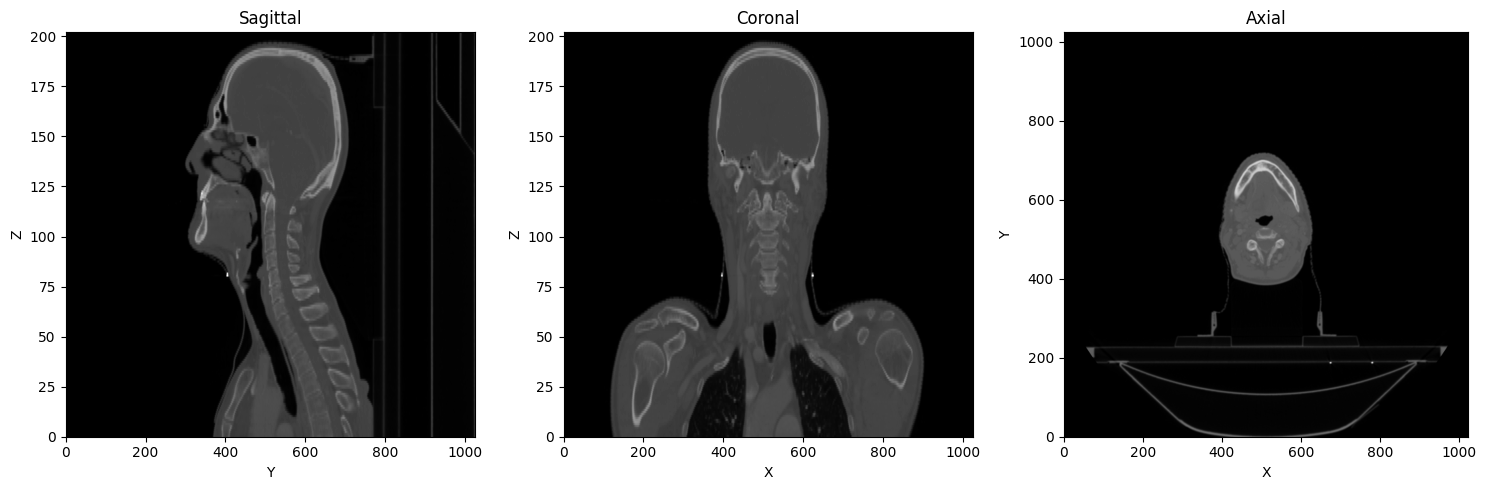

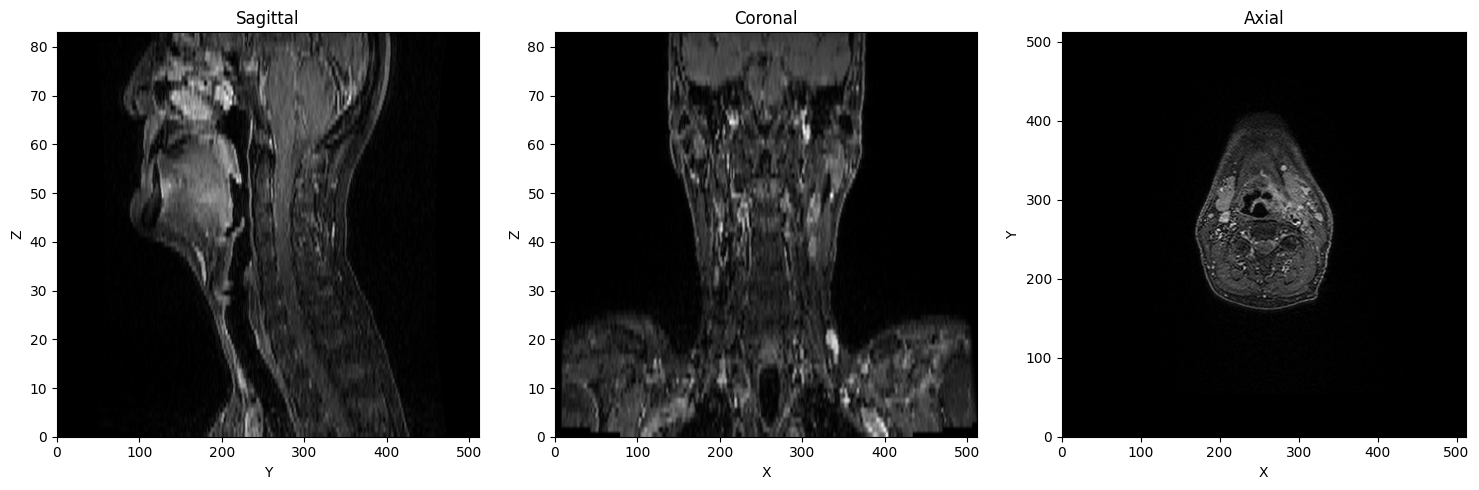

CT image dimensions: (width, height, depth) = (1024, 1024, 202)
MRI image dimensions: (width, height, depth) = (512, 512, 83)


In [11]:


# Example usage:
CT_path = dataset_path + '/case_01_IMG_CT.nrrd'
image2_path = dataset_path + '/case_01_IMG_MR_T1.nrrd'

width, height, depth = get_image_dimensions(CT_path)
width1, height1, depth1 = get_image_dimensions(image2_path)


print(f"CT image dimensions: (width, height, depth) = ({width}, {height}, {depth})")
print(f"MRI image dimensions: (width, height, depth) = ({width1}, {height1}, {depth1})")

Mask dimensions for /mnt/c/Users/benam/Downloads/HaN-Seg/HaN-Seg/set_2/case_01/case_01_stacked_segments.seg.nrrd:


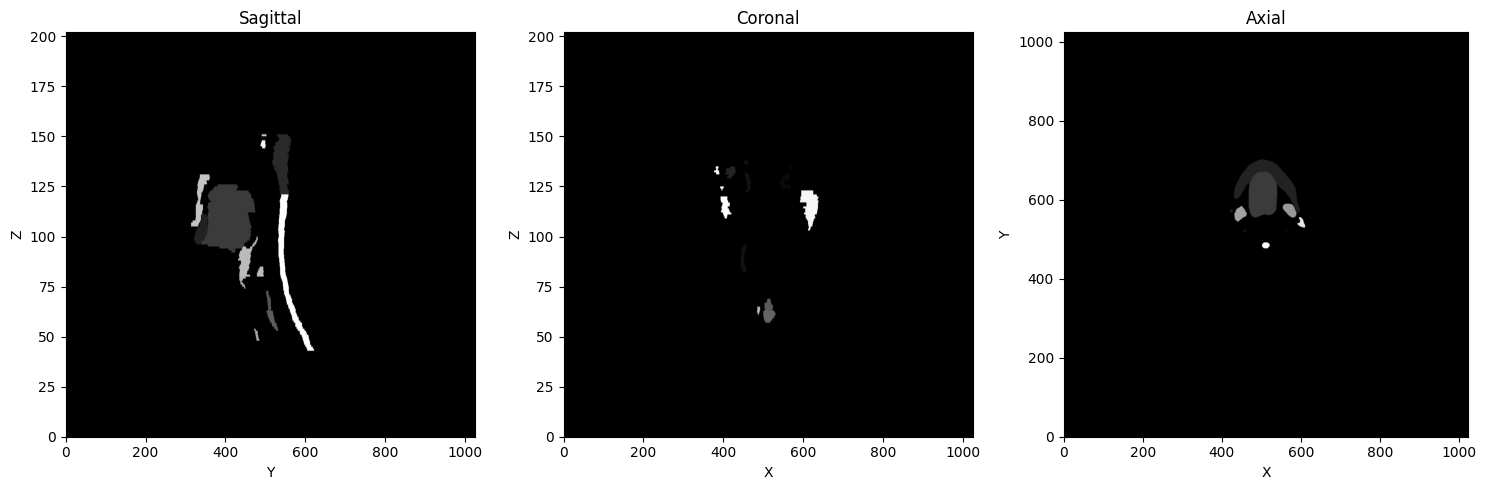

1024 1024 202


In [13]:
full_mask_path = dataset_path + '/case_01_stacked_segments.seg.nrrd'

print(f"Mask dimensions for {full_mask_path}:" )
width, height, depth = get_image_dimensions(full_mask_path)
print(width, height, depth)

In [5]:
import SimpleITK as sitk
import os
import numpy as np

def stack_and_color_masks(mask_paths):
    # Define colors for each organ (you can modify/add more colors as needed)
    colors = [
        [255, 0, 0],     # Red
        [0, 255, 0],     # Green
        [0, 0, 255],     # Blue
        [255, 255, 0],   # Yellow
        [255, 0, 255],   # Magenta
        [0, 255, 255],   # Cyan
        [128, 0, 0],     # Maroon
        [0, 128, 0],     # Green (Lime)
        [0, 0, 128],     # Navy
        [128, 0, 128],   # Purple
        [128, 128, 0],   # Olive
        [0, 128, 128],   # Teal
        [255, 165, 0],   # Orange
        [0, 255, 128],   # Spring Green
        [128, 0, 255],   # Indigo
        [255, 215, 0],   # Gold
        [255, 20, 147],  # Deep Pink
        [0, 0, 0],       # Black
        [255, 255, 255], # White
        [128, 128, 128], # Gray
        [255, 140, 0],   # Dark Orange
        [0, 255, 255],   # Sky Blue
        [0, 128, 128],   # Dark Cyan
        [255, 182, 193], # Light Pink
        [128, 0, 0],     # Dark Red
        [0, 0, 128],     # Dark Blue
        [0, 128, 0],     # Dark Green
        [128, 0, 128],   # Dark Purple
        [255, 215, 0],   # Light Gold
        [0, 255, 255],   # Light Sky Blue
    ]
    
    stacked_mask = None
    
    for idx, mask_path in enumerate(mask_paths):
        mask = sitk.ReadImage(mask_path)
        
        mask_np = sitk.GetArrayFromImage(mask)
        mask_np *= (idx + 1)  # Assigning different intensity values for different masks
        
        color = colors[idx % len(colors)]  # Ensure that colors repeat if there are more masks than colors
        mask_np_colored = np.zeros(mask_np.shape + (3,), dtype=np.uint8)
        mask_np_colored[mask_np > 0] = color
        
        mask_colored = sitk.GetImageFromArray(mask_np_colored)
        mask_colored.CopyInformation(mask)
        
        if stacked_mask is None:
            stacked_mask = mask_colored
        else:
            stacked_mask += mask_colored
    
    return stacked_mask

folder_path = r"C:\Users\benam\Downloads\HaN-Seg\HaN-Seg\set_1\case_01\masks"

mask_paths = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.nrrd')]

stacked_mask = stack_and_color_masks(mask_paths)

output_path = "stacked_mask_colored.tif"
sitk.WriteImage(stacked_mask, output_path)

absolute_path = os.path.abspath(output_path)
print(f"Stacked and colored mask saved as: {absolute_path}")

width, height, depth = get_image_dimensions(absolute_path)


Stacked and colored mask saved as: C:\Users\benam\PycharmProjects\PFA2\stacked_mask_colored.png
Error reading image: C:\Users\benam\PycharmProjects\PFA2\stacked_mask_colored.png
too many indices for image


TypeError: cannot unpack non-iterable NoneType object

In [11]:
import SimpleITK as sitk
from skimage.transform import resize
mr_image = sitk.ReadImage(r"C:\Users\benam\Downloads\HaN-Seg\HaN-Seg\set_1\case_01\case_01_IMG_MR_T1.nrrd")
new_mr_image = resize(sitk.GetArrayViewFromImage(mr_image), (1024, 1024, 202), order=1, anti_aliasing=False)
resized_image = sitk.GetImageFromArray(new_mr_image)
sitk.WriteImage(resized_image, "case_01_IMG_MR_T1_resized.nrrd")
